#### Import the OpenCV package

In [1]:
import cv2
print(cv2.__version__)

4.5.5


#### Import other required packages

In [2]:
# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os

# used to plot our images
import matplotlib.pyplot as plt

# used to change image size
from pylab import rcParams

#### Download an image

In [3]:
# save picture's url in pics_url variable
pics_url = "https://upload.wikimedia.org/wikipedia/commons/archive/7/76/20170623195932%21Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"

# save picture's name as pic
pic = "image.jpg"

# chech if picture is in working directory
if (pic in os.listdir(os.curdir)):
    print("Picture exists")
else:
    # download picture from url and save locally as image.jpg
    urlreq.urlretrieve(pics_url, pic)
    print("Picture downloaded")

Picture exists


#### Display downloaded image

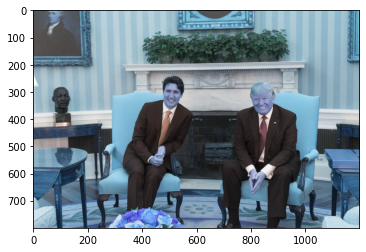

In [4]:
# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

<a id="02"></a>
## Image Processing



#### Fix image colours

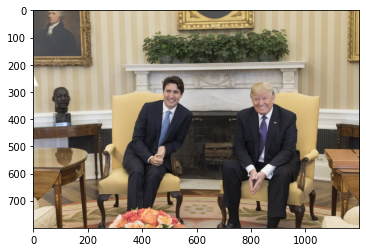

In [5]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

#### Crop Image

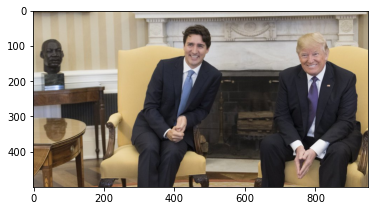

In [6]:
# set dimension for cropping image
x, y, width, depth = 50, 200, 950, 500
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# show image
plt.imshow(image_cropped)

#### Image Zoom In

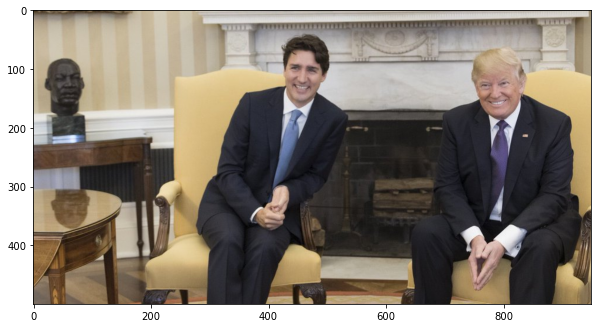

In [7]:
# Set zooming parameters
rcParams['figure.figsize'] = 10, 12
plt.imshow(image_cropped)

#### Remove the displayed axes

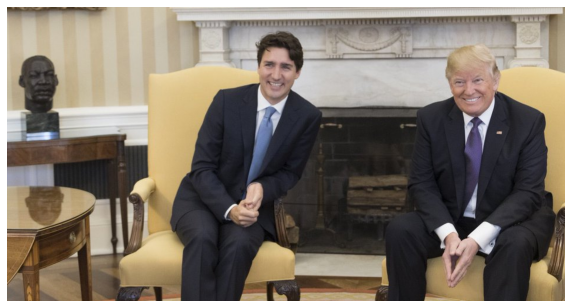

In [8]:
plt.axis("off")
plt.imshow(image_cropped)

#### Convert image to GrayScale

Note: Face detection algorithm used here performs better with grayscale images 

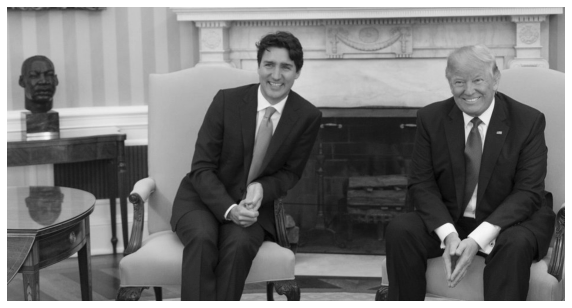

In [9]:
# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

<a id="03"></a>
## Face Detection

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Download face detection algorithm

In [10]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

File exists


#### Detect Faces

In [11]:
# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

Faces:
 [[ 29  92  63  63]
 [745  96  78  78]
 [424  71  74  74]]


#### Display Detected Faces

Text(0.5, 1.0, 'Face Detection')

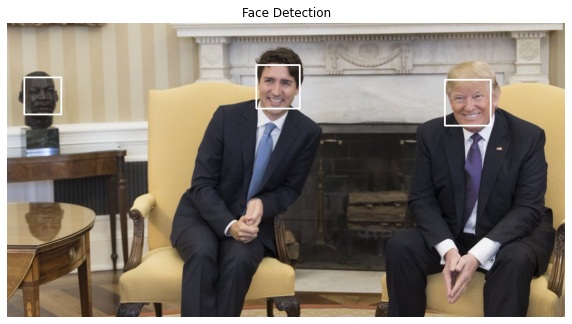

In [12]:
for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

<a id="04"></a>
## Facial Landmarks Detection

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Download Facial Landmark Detection Models

In [13]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "LFBmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

File exists


#### Get facial landmarks

In [14]:
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

# print coordinates of detected landmarks
print("landmarks LBF\n", landmarks)

landmarks LBF
 (array([[[ 31.11154 , 118.67566 ],
        [ 31.461153, 125.93249 ],
        [ 32.354645, 132.82938 ],
        [ 34.14573 , 139.8059  ],
        [ 37.339844, 146.4027  ],
        [ 42.147182, 152.32312 ],
        [ 47.91391 , 157.15724 ],
        [ 54.75613 , 160.5066  ],
        [ 62.00524 , 160.55038 ],
        [ 68.33036 , 158.90073 ],
        [ 73.30743 , 154.9331  ],
        [ 77.67344 , 149.26772 ],
        [ 81.06554 , 142.74902 ],
        [ 83.12104 , 135.51933 ],
        [ 84.21666 , 128.4003  ],
        [ 84.14834 , 121.403946],
        [ 83.378586, 114.55182 ],
        [ 36.339207, 112.154884],
        [ 40.07913 , 108.87551 ],
        [ 45.565315, 107.89721 ],
        [ 51.20774 , 108.44131 ],
        [ 56.77564 , 110.136826],
        [ 63.421314, 110.18029 ],
        [ 67.989784, 108.02704 ],
        [ 73.073715, 106.59671 ],
        [ 78.25146 , 106.48395 ],
        [ 81.559326, 109.54402 ],
        [ 60.570854, 114.74757 ],
        [ 61.068363, 119.10057 ]

#### Display Landmarks

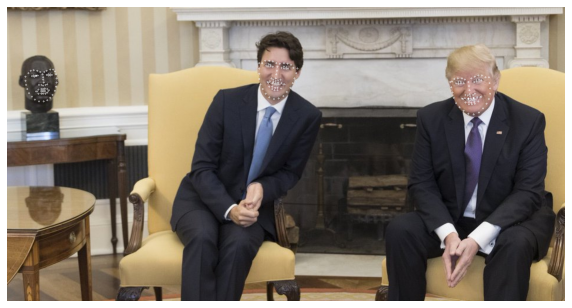

In [15]:
for landmark in landmarks:
    for x, y in landmark[0]:
        # Display landmarks on "img_cropped" with white color in BGR and thickness 1
        cv2.circle(image_cropped, (int(x), int(y)), 1, (255, 255, 255), 1)

# Display the image with landmarks
plt.axis("off")
plt.imshow(image_cropped)
plt.show()

#### Zoom in to each landmarks

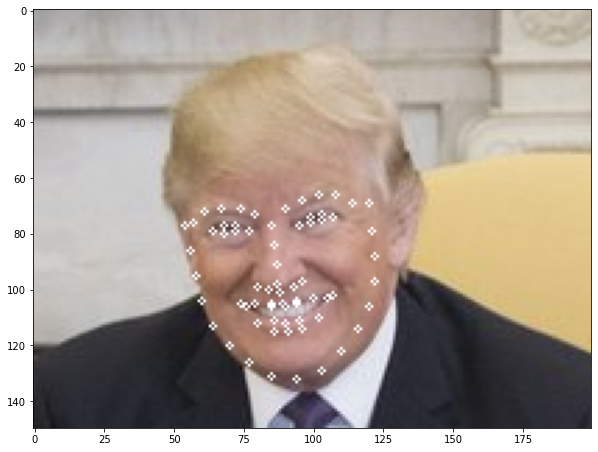

In [16]:
# set cropped image
x, y, width, depth = 700, 50, 200, 150
image_cropped3 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped3)

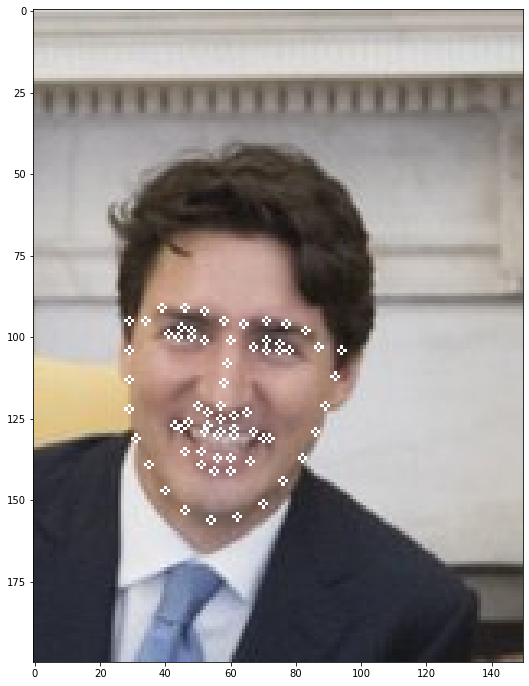

In [17]:
# set cropped image
x, y, width, depth = 400, 0, 150, 200
image_cropped2 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped2)

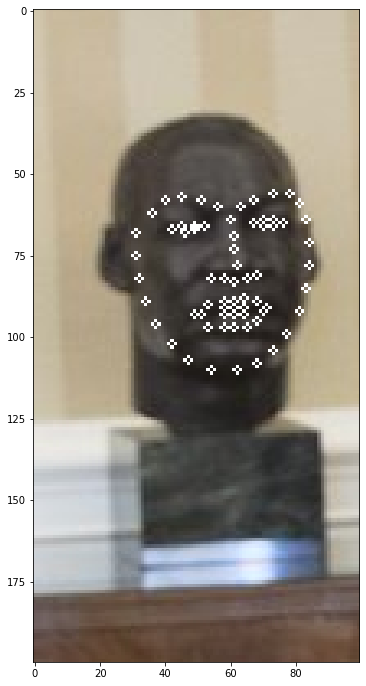

In [18]:
# set cropped image
x, y, width, depth = 0, 50, 100, 200
image_cropped1 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped1)

In [19]:
# save picture's name as pic
pic2 = "img2.jpg"



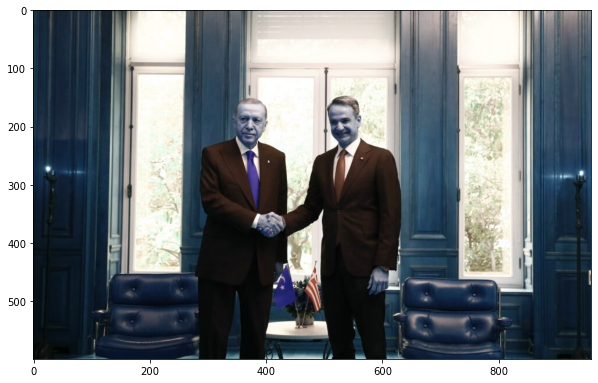

In [20]:
# read image with openCV
img = cv2.imread(pic2)

# plot image with matplotlib package
plt.imshow(img)

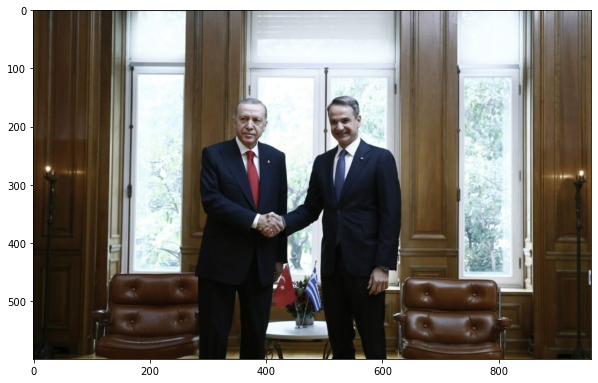

In [21]:
# convert image to RGB colour
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(img_rgb)

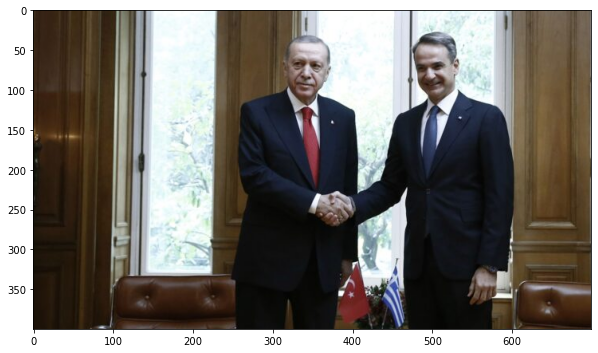

In [22]:
x, y, width, depth = 30, 120, 700, 400
img_cropped = img_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
img_template = img_cropped.copy()

# show image
plt.imshow(img_cropped)

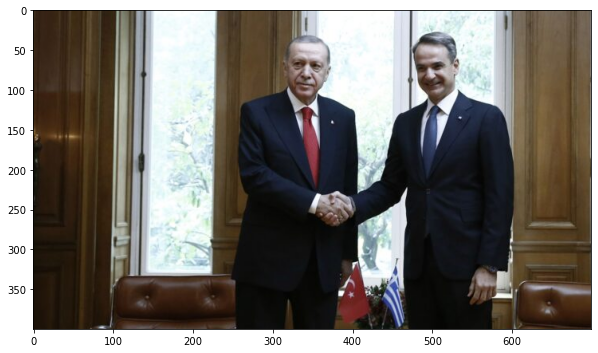

In [23]:
rcParams['figure.figsize'] = 10, 12
plt.imshow(img_cropped)

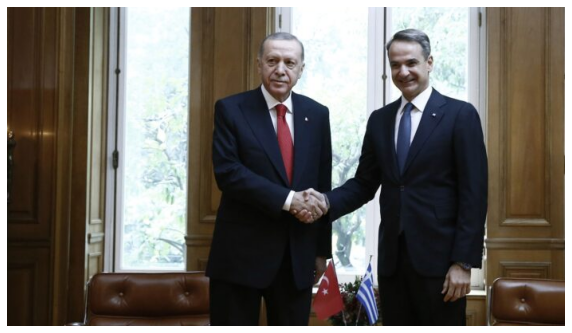

In [24]:
plt.axis("off")
plt.imshow(img_cropped)

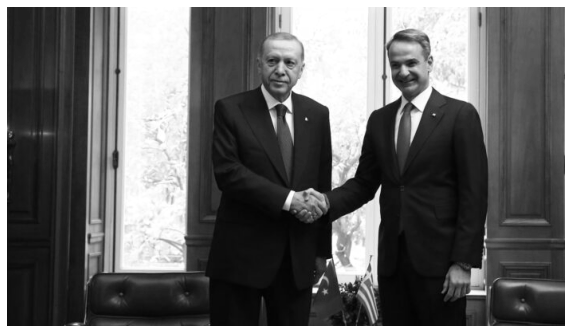

In [25]:
img_gray = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)

# remove axes
plt.axis("off")
plt.imshow(img_gray, cmap = "gray")

In [26]:
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

File exists


In [27]:
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(img_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

Faces:
 [[313  45  62  62]
 [472  53  52  52]]


Text(0.5, 1.0, 'Face Detection')

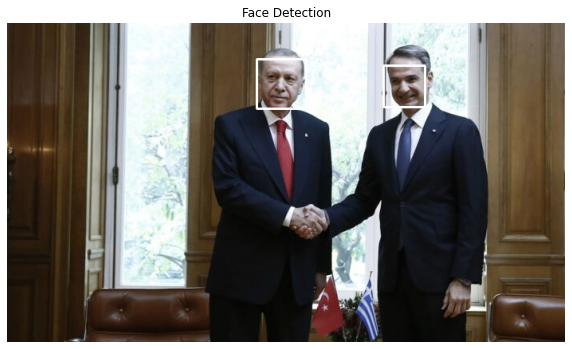

In [28]:
for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(img_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(img_template)
plt.title('Face Detection')

In [29]:
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "LFBmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

File exists


In [30]:
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(img_gray, faces)

# print coordinates of detected landmarks
print("landmarks LBF\n", landmarks)

landmarks LBF
 (array([[[319.19388 ,  67.06172 ],
        [318.35858 ,  73.79932 ],
        [318.16028 ,  80.865715],
        [318.9245  ,  87.537964],
        [321.05637 ,  93.818016],
        [324.50583 ,  99.48794 ],
        [329.12872 , 104.277916],
        [334.52847 , 107.78848 ],
        [340.55655 , 108.889534],
        [346.6989  , 108.60088 ],
        [351.95584 , 105.504745],
        [356.7572  , 101.426605],
        [360.3824  ,  96.321495],
        [362.48773 ,  90.70302 ],
        [364.10776 ,  85.01697 ],
        [365.28653 ,  79.13664 ],
        [365.85474 ,  73.39469 ],
        [324.0087  ,  63.93242 ],
        [327.91342 ,  60.89252 ],
        [333.0242  ,  60.18954 ],
        [338.1501  ,  61.5421  ],
        [342.64346 ,  64.1027  ],
        [348.44647 ,  64.86258 ],
        [353.10373 ,  63.190582],
        [358.0241  ,  62.901577],
        [362.3488  ,  64.62938 ],
        [364.51428 ,  68.452934],
        [344.82352 ,  68.43468 ],
        [344.25662 ,  72.73652 ]

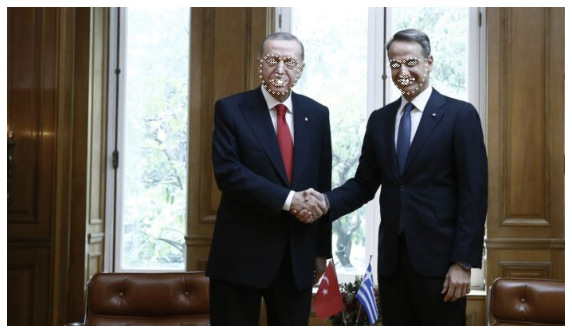

In [31]:
for landmark in landmarks:
    for x, y in landmark[0]:
        # Display landmarks on "img_cropped" with white color in BGR and thickness 1
        cv2.circle(img_cropped, (int(x), int(y)), 1, (255, 255, 255), 1)

# Display the image with landmarks
plt.axis("off")
plt.imshow(img_cropped)
plt.show()


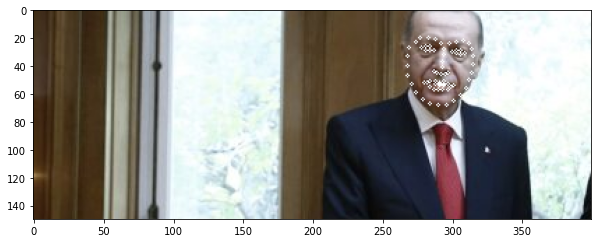

In [32]:
x, y, width, depth = 50, 40, 400, 150
img_cropped3 = img_cropped[y:(y+depth), x:(x+width)]

plt.imshow(img_cropped3)

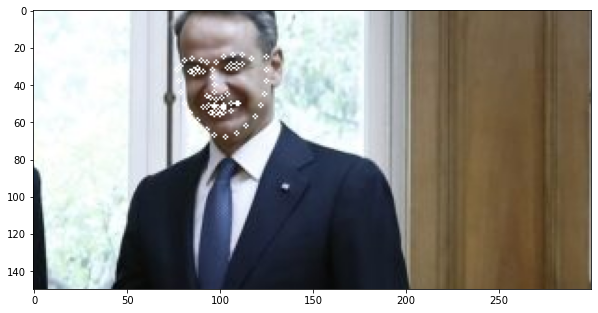

In [33]:
x, y, width, depth = 400, 40, 600, 150
img_cropped3 = img_cropped[y:(y+depth), x:(x+width)]

plt.imshow(img_cropped3)

In [37]:
import cv2
import mediapipe as mp

In [38]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

my_drawing_specs = mp_drawing.DrawingSpec(color = (0, 255, 0), thickness = 1)

In [39]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

cap = cv2.VideoCapture(0)

with mp_face_mesh.FaceMesh(
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    ) as face_mesh:

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        # Convert the BGR image to RGB before processing.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        # Convert back to BGR after processing.
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
                )

                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()
                )

        cv2.imshow("My video capture", cv2.flip(image, 1))

        if cv2.waitKey(100) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
